In [ ]:
!nvidia-smi

Mon Sep 11 13:42:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Import necessary libraries
# !pip install tensorflow
# !pip install keras
import tensorflow as tf
import keras
from keras.layers import Conv2D, Flatten, Dense, Input, Lambda, Dropout
from keras.models import Sequential, Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img

from glob import glob

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ROOT_PATH = '/content/drive/MyDrive'

In [ ]:
!pwd

/content


In [ ]:

import os
os.chdir(ROOT_PATH)
os.getcwd()

'/content/drive/MyDrive'

In [ ]:
!ls

 12certificate.pdf
 4th_Sem_ResearchPapers
'Activity Diagram'
'Activity .pdf'
'B3_G13_WBS - WBS.gsheet'
'Colab Notebooks'
'Copy of Linkedin_screenshot.jpg'
 Diabetic_Retinopathy_Dataset
 Diabetic_Retinopathy_Dataset_old
'Document from Maaz Sayyed'
'Document from Maaz Sayyed (1)'
'Document from Maaz Sayyed (1).pdf'
'Document from Maaz Sayyed (2).pdf'
'Document from Maaz Sayyed.pdf'
 ds
 DSAAT.pdf
'DS_Block chain and PageRank Algorithm.pdf'
'ds lab'
'DS_Literature  Review (1).gdoc'
'DS_Literature  Review.gdoc'
' HEALTHY MINDS  LOGIC.gdoc'
 hsc_marksheet.txt
 Images
 Images_Arts
 IT_A_12110133.pdf
 IT_A_12110133_VATSALYA
 Kaagaz_20220320_1917506242.pdf
 Linkedin_screenshot.jpg
'MAR Lab Journal Index page and Front page June 22.pdf'
'Muaz Sayyed_49_Linked List'
'Muaz Sayyed_49_Linked List (1)'
 Narasimha_Karumanchi_Data_Structures.gdoc
'P_49_MAD LAB_1.docx'
'Photo from Maaz Sayyed'
'Resume (1).gdoc'
'Resume (2).gdoc'
 Resume.gdoc
'Simio Assignment 3.spfx'
 SystemDesign.gdoc
'Untitled docum

In [ ]:
# Re-size all the images to this
IMAGE_SIZE = [224,224]


train_path =      '/content/drive/MyDrive/Diabetic_Retinopathy_Dataset/train'

test_path =       '/content/drive/MyDrive/Diabetic_Retinopathy_Dataset/test'

validation_path = '/content/drive/MyDrive/Diabetic_Retinopathy_Dataset/validation'


In [ ]:
# Import vgg16 lib. as shown below and add preprocessing layer to the front of VGG

# Here we will be using the Imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE +[3], weights='imagenet', include_top=False)

# Multiple Models
# {
#   'name_of_model' : model(parameters)
# }




58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Don't train the Existing Layer or Convolution Layers
for layer in vgg16.layers:
  layer.trainable = False
  print(layer.name, layer.trainable)
  # 1. utils

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
# Summary of Model
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Useful fr getting number of Output Classes in Datset
folders = glob('/content/drive/MyDrive/Diabetic_Retinopathy_Dataset/train/*')
folders
# 2. Outout Ca=lasses Data

['/content/drive/MyDrive/Diabetic_Retinopathy_Dataset/train/Proliferate_DR',
 '/content/drive/MyDrive/Diabetic_Retinopathy_Dataset/train/Severe',
 '/content/drive/MyDrive/Diabetic_Retinopathy_Dataset/train/Moderate',
 '/content/drive/MyDrive/Diabetic_Retinopathy_Dataset/train/No_DR',
 '/content/drive/MyDrive/Diabetic_Retinopathy_Dataset/train/Mild']

In [ ]:
# Number of o/p classes
print(f"Output Classes: {len(folders)}")

Output Classes: 5


In [ ]:
# Define model's top layer
model = Sequential()
model
# 3. Define Model

In [ ]:
# Add base_model in model
model.add(vgg16)
# Add given mutiple by iteration

In [ ]:
# Add Fully Connected Layers
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Droput(0.4))
model.add(Dense(5,activation='softmax'))
# It will be same for all

In [ ]:
# Structure of Entire Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 21138757 (80.64 MB)
Trainable params: 6424069 (24.51 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
# Compile the Model

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)



# Same for all

In [ ]:
# Use the Image Data Generator to import images from the dataset

train_data_gen = ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True
)

validation_data_gen = ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True
)


test_data_gen = ImageDataGenerator(rescale=1./255)

# Image Preprocessor obj



In [ ]:
!pwd

/content/drive/MyDrive


In [ ]:
# Provide the same  target size as  initialized for the image size

# Store proprocessed images in respective sets

train_data_set = train_data_gen.flow_from_directory(
      train_path,
      target_size=(224,224),
      batch_size=32,
      class_mode='categorical'
)


validation_data_set = validation_data_gen.flow_from_directory(
      validation_path,
      target_size=(224,224),
      batch_size=32,
      class_mode='categorical'
)


test_data_set = test_data_gen.flow_from_directory(
      test_path,
      target_size=(224,224),
      batch_size=32,
      class_mode='categorical'
)

# Split train-test-valud set of images with processing


Found 2744 images belonging to 5 classes.
Found 369 images belonging to 5 classes.
Found 549 images belonging to 5 classes.


In [ ]:
# Fit the model for train and valdation data
model_fit = model.fit(
        train_data_set,
        validation_data=validation_data_set,
        epochs=3,
        steps_per_epoch=len(train_data_set),
        validation_steps= len(validation_data_set)
)

# It will be same for all

Epoch 1/3
86/86 [==============================] - 1120s 13s/step - loss: 1.3583 - accuracy: 0.6418 - val_loss: 0.7696 - val_accuracy: 0.7154
Epoch 2/3
86/86 [==============================] - 49s 569ms/step - loss: 0.8088 - accuracy: 0.7085 - val_loss: 0.7237 - val_accuracy: 0.7263
Epoch 3/3
86/86 [==============================] - 49s 571ms/step - loss: 0.7884 - accuracy: 0.7095 - val_loss: 0.7344 - val_accuracy: 0.7209


In [ ]:
# Evaluate model on test data
# Return loss and accuracy on test data for each model
# Save the model

In [ ]:
model_fit

In [ ]:
model_fit.history

{'loss': [1.3582987785339355, 0.8088158965110779, 0.7883672714233398],
 'accuracy': [0.6417638659477234, 0.7084547877311707, 0.7095481157302856],
 'val_loss': [0.7695791125297546, 0.7236787676811218, 0.7344180941581726],
 'val_accuracy': [0.7154471278190613, 0.7262872457504272, 0.7208672165870667]}

<Axes: >

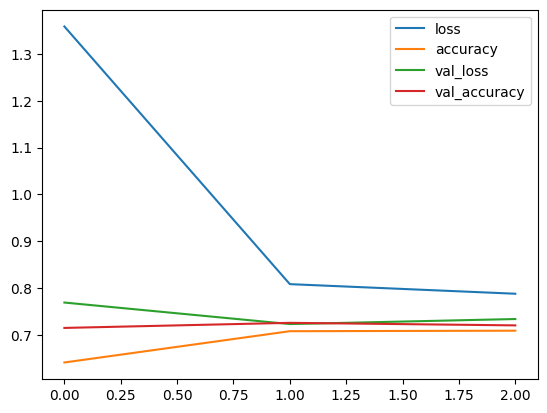

In [ ]:
import pandas as pd

pd.DataFrame(model_fit.history).plot()

In [ ]:
test_data_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
predictions = model.predict(test_data_set)

18/18 [==============================] - 201s 12s/step


In [ ]:
predictions

array([[3.4954023e-02, 7.1615064e-01, 5.5348774e-04, 1.9335513e-01,
        5.4986663e-02],
       [2.4795683e-01, 4.1163188e-01, 4.6710841e-02, 2.0855421e-01,
        8.5146263e-02],
       [1.2584208e-02, 8.9552496e-03, 9.5727897e-01, 1.0634313e-02,
        1.0547239e-02],
       ...,
       [7.2244808e-02, 7.4506068e-01, 1.7436316e-03, 1.0866283e-01,
        7.2288074e-02],
       [2.4354826e-01, 3.3336726e-01, 2.3823787e-01, 1.1912511e-01,
        6.5721489e-02],
       [1.6086023e-02, 1.4314096e-02, 9.6655089e-01, 2.2568598e-03,
        7.9213071e-04]], dtype=float32)

In [ ]:
tru_labels = test_data_set.classes
tru_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
predicted_labels = np.argmax(predictions,axis=1)
predicted_labels

array([1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 4, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 4, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,

In [ ]:
evaluation = model.evaluate(test_data_set)

18/18 [==============================] - 3s 153ms/step - loss: 0.7252 - accuracy: 0.7341


In [ ]:
evaluation[0]

0.7251762747764587

In [ ]:
evaluation[1]

0.7340619564056396

In [ ]:
accuracy = np.sum(tru_labels == predicted_labels) / len(tru_labels)
accuracy

0.38979963570127507

In [ ]:
ev = model.evaluate(validation_data_set)
ev

12/12 [==============================] - 6s 518ms/step - loss: 0.7227 - accuracy: 0.7209


[0.7227498888969421, 0.7208672165870667]

In [ ]:
ev = model.evaluate(train_data_set)
ev

86/86 [==============================] - 43s 502ms/step - loss: 0.7550 - accuracy: 0.7179


[0.7550457119941711, 0.717930018901825]

In [ ]:
class_map = train_data_set.class_indices

In [ ]:
class_map

{'Mild': 0, 'Moderate': 1, 'No_DR': 2, 'Proliferate_DR': 3, 'Severe': 4}

In [ ]:
class_map['Mild']

0

In [ ]:
len(train_data_set.class_indices)

5